In [4]:
import numpy as np
import matplotlib.pyplot as plt

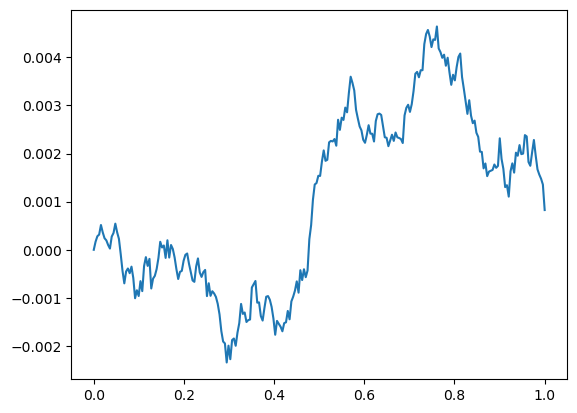

In [10]:
#1ere Methode 

x0 = 0
T = 1
n = 252
step = T/n

t = np.linspace(0,T,num=n)
GV = np.random.normal(0,step,252)
dW = np.sqrt(step)*GV
dW[0] = x0
W = np.cumsum(dW)


plt.plot(t,W)
plt.show()

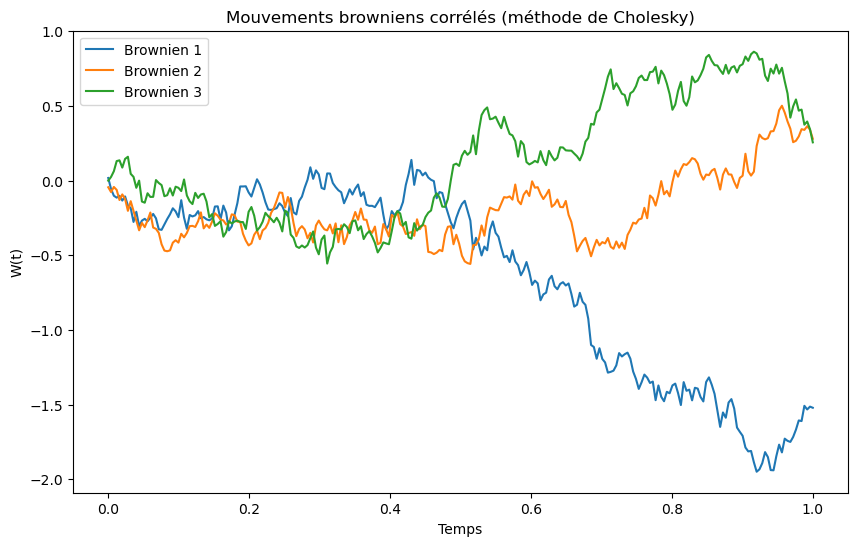

In [14]:
#2e Methode 

x0 = 0
T = 1
n = 252
step = T/n

#Je crée la matrice de corrélation avec la méthode de Cholesky
A = np.random.randn(3, 3)
Sigma = A @ A.T 
D = np.sqrt(np.diag(Sigma))
corr = Sigma / np.outer(D, D)


L = np.linalg.cholesky(corr) #Lower triangular matrix
Z = np.random.randn(n, 3) #Gaussian matrix
dW = Z @ L.T * np.sqrt(step) 
W = np.cumsum(dW, axis=0) #Brownian motion path


t = np.linspace(0,T,num=n) #Time space

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(t, W[:, i], label=f"Brownien {i+1}")
plt.legend()
plt.title("Mouvements browniens corrélés (méthode de Cholesky)")
plt.xlabel("Temps")
plt.ylabel("W(t)")
plt.show()